In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [96]:
dataset = pd.read_csv("occupancy.csv")
dataset

,id,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,140,2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
1,141,2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1
2,142,2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
3,143,2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
4,144,2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...,...
2660,2800,2015-02-04 10:38:59,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2661,2801,2015-02-04 10:40:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2662,2802,2015-02-04 10:40:59,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2663,2803,2015-02-04 10:41:59,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [97]:
X = dataset[['CO2', 'Light']].values
y = dataset[['Occupancy']].values

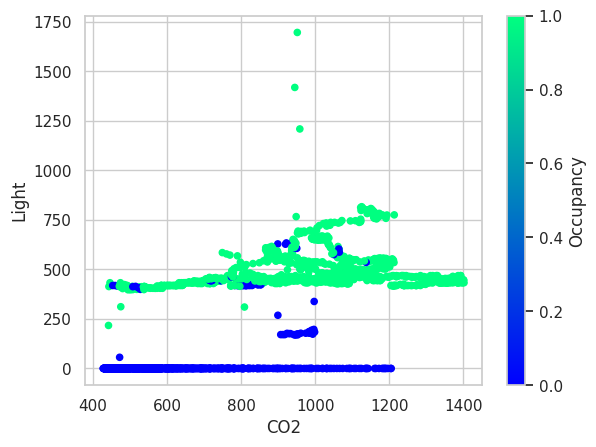

In [98]:
dataset.plot.scatter(x='CO2',y='Light', c='Occupancy', colormap='winter')
plt.show()

In [99]:
#data split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [100]:
# Normalize the features
X_train=(X_train - X_train.mean())/X_train.std()
X_test=(X_test - X_test.mean())/X_test.std()


### 2. Modèle

In [101]:
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [102]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [103]:
# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

### 3. Fonction Coût

In [104]:
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

###  4. Optimisation - Gradient et Descente de Gradient

In [105]:
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [106]:
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

### 5. Prédiction

In [107]:
def predict(X, W, b):
    A = modele(X, W, b)
    print(A)
    return A >= 0.5

### 5. Modèle final

In [108]:
def regression_logistique(X, y, learning_rate=0.1, n_iter=10000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W,b

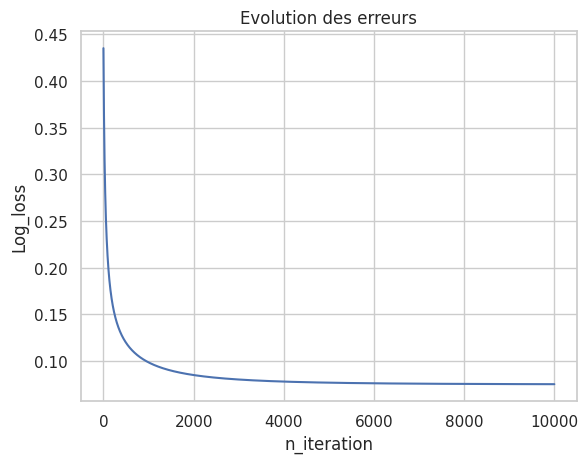

In [109]:
W,b=regression_logistique(X_train, y_train)

### 5. 1 Evaluation du modèle et Visualisation

In [110]:
from sklearn.metrics import accuracy_score
y_pred = predict(X_test, W, b)
print("Accuracy=",accuracy_score(y_test, y_pred))

[[0.99564376]
 [0.99939832]
 [0.00184982]
 [0.99674105]
 [0.00653555]
 [0.00416055]
 [0.00177022]
 [0.00169765]
 [0.00184142]
 [0.99309992]
 [0.96935396]
 [0.97172752]
 [0.99099154]
 [0.00176085]
 [0.97614337]
 [0.00188284]
 [0.00221561]
 [0.01536599]
 [0.00188474]
 [0.00252985]
 [0.00171343]
 [0.0017846 ]
 [0.00204144]
 [0.00195263]
 [0.99014225]
 [0.00173408]
 [0.83059149]
 [0.00297649]
 [0.89064929]
 [0.98433748]
 [0.00185403]
 [0.99706142]
 [0.00189669]
 [0.9817523 ]
 [0.00171083]
 [0.00193739]
 [0.98529999]
 [0.96720961]
 [0.99556331]
 [0.98201605]
 [0.00207263]
 [0.00173434]
 [0.00175241]
 [0.00260969]
 [0.00222066]
 [0.00185263]
 [0.98560172]
 [0.00188522]
 [0.00179591]
 [0.00263752]
 [0.00191693]
 [0.8795022 ]
 [0.98703048]
 [0.00209157]
 [0.00267982]
 [0.98309989]
 [0.00181004]
 [0.99507583]
 [0.92243746]
 [0.99196962]
 [0.00191316]
 [0.00286963]
 [0.00190968]
 [0.90297594]
 [0.00190245]
 [0.97847205]
 [0.97553642]
 [0.87812679]
 [0.00511068]
 [0.00200311]
 [0.00219888]
 [0.91

[0.99260798]
[ True]
[0.99908694]
[ True]
[0.0034229]
[False]


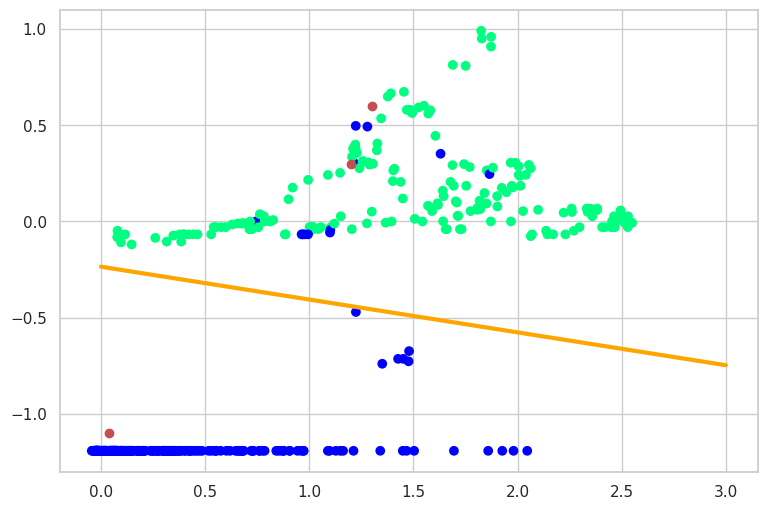

In [111]:
# Visualiser le dataset
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X_test[:,0], X_test[:, 1], c=y_test, cmap='winter')

# Dessiner la frontière de décision
x1 = np.linspace(0, 3, 1000)
x2 = ( - W[0] * x1 - b) / W[1]
ax.plot(x1, x2, c='orange', lw=3)

# Prédire la classe de nouveaux éléments
new_1=np.array([1.2,0.3])
new_2=np.array([1.3,0.6])
new_3=np.array([0.04,-1.1])
ax.scatter(new_1[0], new_1[1], c='r')
ax.scatter(new_2[0], new_2[1], c='r')
ax.scatter(new_3[0], new_3[1], c='r')
print(predict(new_1, W, b))
print(predict(new_2, W, b))
print(predict(new_3, W, b))

plt.show()

In [112]:
#Affichage de la matrice de confusion

from sklearn.metrics import confusion_matrix
y_pred = predict(X_test, W, b)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[0.99564376]
 [0.99939832]
 [0.00184982]
 [0.99674105]
 [0.00653555]
 [0.00416055]
 [0.00177022]
 [0.00169765]
 [0.00184142]
 [0.99309992]
 [0.96935396]
 [0.97172752]
 [0.99099154]
 [0.00176085]
 [0.97614337]
 [0.00188284]
 [0.00221561]
 [0.01536599]
 [0.00188474]
 [0.00252985]
 [0.00171343]
 [0.0017846 ]
 [0.00204144]
 [0.00195263]
 [0.99014225]
 [0.00173408]
 [0.83059149]
 [0.00297649]
 [0.89064929]
 [0.98433748]
 [0.00185403]
 [0.99706142]
 [0.00189669]
 [0.9817523 ]
 [0.00171083]
 [0.00193739]
 [0.98529999]
 [0.96720961]
 [0.99556331]
 [0.98201605]
 [0.00207263]
 [0.00173434]
 [0.00175241]
 [0.00260969]
 [0.00222066]
 [0.00185263]
 [0.98560172]
 [0.00188522]
 [0.00179591]
 [0.00263752]
 [0.00191693]
 [0.8795022 ]
 [0.98703048]
 [0.00209157]
 [0.00267982]
 [0.98309989]
 [0.00181004]
 [0.99507583]
 [0.92243746]
 [0.99196962]
 [0.00191316]
 [0.00286963]
 [0.00190968]
 [0.90297594]
 [0.00190245]
 [0.97847205]
 [0.97553642]
 [0.87812679]
 [0.00511068]
 [0.00200311]
 [0.00219888]
 [0.91

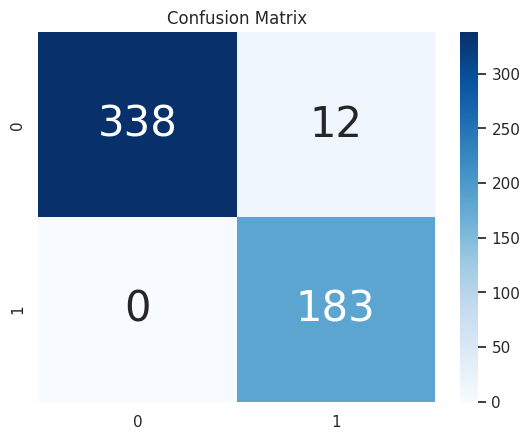

In [113]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap
## https://www.kaggle.com/agungor2/various-confusion-matrix-plots
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

### Classification avec 3 features

In [114]:
X = dataset[['CO2', 'Light','Humidity']].values
y = dataset[['Occupancy']].values

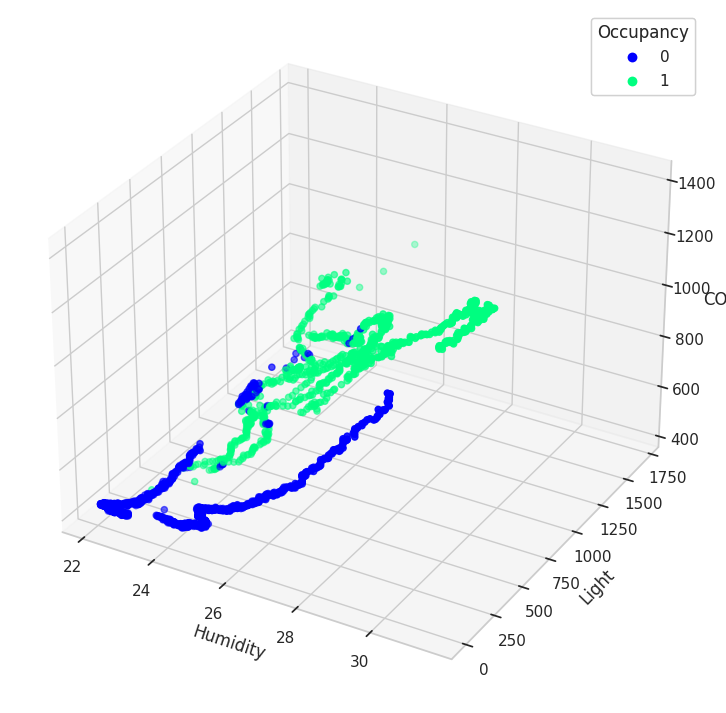

In [115]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with points colored by 'Occupancy'
scatter = ax.scatter(dataset['Humidity'], dataset['Light'], dataset['CO2'], c=dataset['Occupancy'], cmap='winter')

# Set labels for the axes
ax.set_xlabel('Humidity')
ax.set_ylabel('Light')
ax.set_zlabel('CO2')

# Create a colorbar
legend = ax.legend(*scatter.legend_elements(), title='Occupancy')
ax.add_artist(legend)

# Show the plot
plt.show()

In [116]:
# data split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [117]:
X_train=(X_train-X_train.mean())/X_train.std()
X_test=(X_test-X_test.mean())/X_test.std()

### 2. Modèle


In [118]:
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [119]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [120]:
# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

### 3. Fonction Coût

In [121]:
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

### 4. Optimisation - Gradient et Descente de Gradient

In [122]:
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [123]:
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

### 5. Prédiction

In [124]:
def predict(X, W, b):
    A = modele(X, W, b)
    print(A)
    return A >= 0.5

### 5.1 Modèle final

In [125]:
def regression_logistique(X, y, learning_rate=0.1, n_iter=10000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W,b

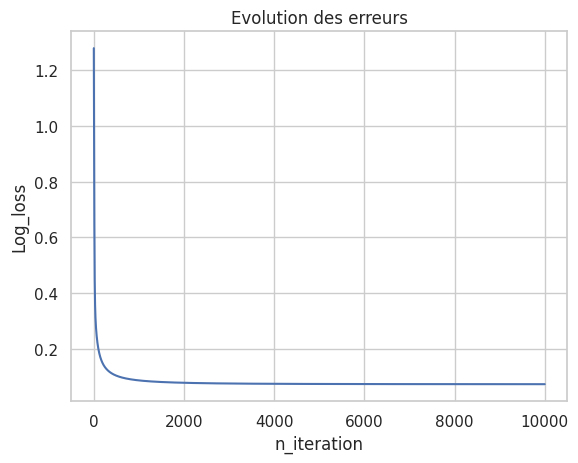

In [126]:
W,b=regression_logistique(X_train, y_train)

### 5.2 Evaluation du modèle et Visualisation

In [127]:
from sklearn.metrics import accuracy_score
y_pred = predict(X_test, W, b)
print("Accuracy=",accuracy_score(y_test, y_pred))

[[0.99596468]
 [0.9994668 ]
 [0.00156606]
 [0.99674698]
 [0.00516075]
 [0.00336891]
 [0.00150228]
 [0.00144425]
 [0.00155926]
 [0.99301157]
 [0.96727769]
 [0.96967062]
 [0.99105451]
 [0.00149486]
 [0.97584022]
 [0.00159241]
 [0.00185809]
 [0.01158214]
 [0.00159494]
 [0.00210579]
 [0.00145703]
 [0.00151377]
 [0.00172004]
 [0.00164917]
 [0.989387  ]
 [0.00147338]
 [0.83578422]
 [0.00245555]
 [0.8929665 ]
 [0.98416036]
 [0.00156938]
 [0.99707864]
 [0.00160431]
 [0.98192154]
 [0.00145483]
 [0.00163606]
 [0.98469911]
 [0.96494363]
 [0.99562087]
 [0.98156569]
 [0.00174487]
 [0.00147359]
 [0.00148831]
 [0.0021686 ]
 [0.00186104]
 [0.00156933]
 [0.98519982]
 [0.00159513]
 [0.00152282]
 [0.00219048]
 [0.00161963]
 [0.88333954]
 [0.98598314]
 [0.00175992]
 [0.00222367]
 [0.98270751]
 [0.00153415]
 [0.99541319]
 [0.9226301 ]
 [0.99206619]
 [0.00161766]
 [0.00237207]
 [0.00161467]
 [0.90587858]
 [0.00160888]
 [0.97827317]
 [0.97491587]
 [0.8820645 ]
 [0.00409116]
 [0.0016895 ]
 [0.00184376]
 [0.91

[0.90258197]
[ True]
[0.98535537]
[ True]
[0.00026163]
[False]


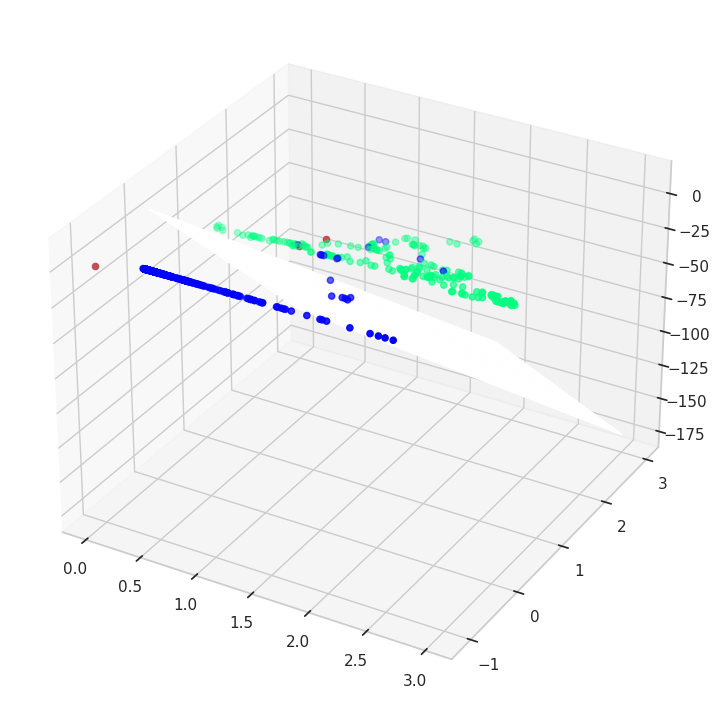

In [128]:
# Visualiser le dataset

sns.set(style="whitegrid")
fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:,0], X_test[:, 1], X_test[:, 2],c=y_test, cmap='winter')

# Dessiner la frontière de décision
x1 = np.linspace(0, 3, 100)
x2 = np.linspace(0, 3, 100)
x1, x2 = np.meshgrid(x1, x2)
x3 = (-W[0] * x1 - W[1] * x2 - b) / W[2]
#dessiner la frontiere de descision
ax.plot_surface(x1, x2, x3, alpha=0.3, color='orange')

# Prédire la classe de nouveaux éléments
new_1=np.array([1.2,0.3,1.7])
new_2=np.array([1.3,0.6,0.8])
new_3=np.array([0.04,-1.1,1.9])
ax.scatter(new_1[0], new_1[1], new_1[2], c='r')
ax.scatter(new_2[0], new_2[1], new_2[2], c='r')
ax.scatter(new_3[0], new_3[1], new_3[2], c='r')

print(predict(new_1, W, b))
print(predict(new_2, W, b))
print(predict(new_3, W, b))

plt.show()



In [129]:
#Affichage de la matrice de confusion

from sklearn.metrics import confusion_matrix
y_pred = predict(X_test, W, b)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[0.99596468]
 [0.9994668 ]
 [0.00156606]
 [0.99674698]
 [0.00516075]
 [0.00336891]
 [0.00150228]
 [0.00144425]
 [0.00155926]
 [0.99301157]
 [0.96727769]
 [0.96967062]
 [0.99105451]
 [0.00149486]
 [0.97584022]
 [0.00159241]
 [0.00185809]
 [0.01158214]
 [0.00159494]
 [0.00210579]
 [0.00145703]
 [0.00151377]
 [0.00172004]
 [0.00164917]
 [0.989387  ]
 [0.00147338]
 [0.83578422]
 [0.00245555]
 [0.8929665 ]
 [0.98416036]
 [0.00156938]
 [0.99707864]
 [0.00160431]
 [0.98192154]
 [0.00145483]
 [0.00163606]
 [0.98469911]
 [0.96494363]
 [0.99562087]
 [0.98156569]
 [0.00174487]
 [0.00147359]
 [0.00148831]
 [0.0021686 ]
 [0.00186104]
 [0.00156933]
 [0.98519982]
 [0.00159513]
 [0.00152282]
 [0.00219048]
 [0.00161963]
 [0.88333954]
 [0.98598314]
 [0.00175992]
 [0.00222367]
 [0.98270751]
 [0.00153415]
 [0.99541319]
 [0.9226301 ]
 [0.99206619]
 [0.00161766]
 [0.00237207]
 [0.00161467]
 [0.90587858]
 [0.00160888]
 [0.97827317]
 [0.97491587]
 [0.8820645 ]
 [0.00409116]
 [0.0016895 ]
 [0.00184376]
 [0.91

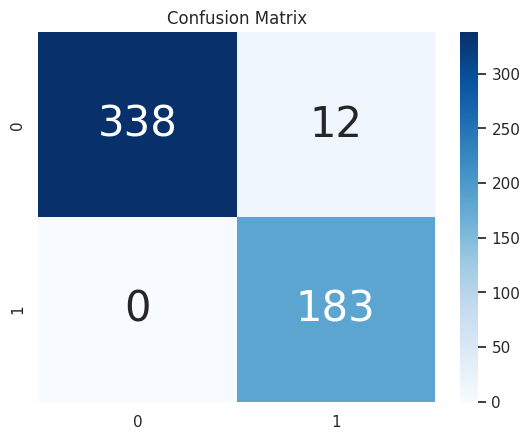

In [130]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap
## https://www.kaggle.com/agungor2/various-confusion-matrix-plots
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()